In [0]:
# -*- coding: utf-8 -*-
#@title Initialization
import tensorflow as tf
device_name = tf.test.gpu_device_name()
#if device_name != '/device:GPU:0':
#  raise SystemError('GPU device not found')
#print('Found GPU at: {}'.format(device_name))

#@title Dataset
#@title LOAD DATASET { output-height: 100 }
import os
import cPickle
os.environ["KERAS_BACKEND"] = "tensorflow"
import numpy as np
import keras.models as models
from keras.layers.core import Reshape, Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D, ZeroPadding2D
import matplotlib.pyplot as plt
import pickle
import keras
import sys
sys.path.append('../confusion')
from sklearn.metrics import confusion_matrix
from sklearn.metrics import cohen_kappa_score, accuracy_score
from keras.layers import Input
from keras.layers.merge import concatenate
from keras.models import Model
from keras.utils import plot_model
from keras.layers import Input, LSTM, Dense
with open("RML2016.10b.dat", 'rb') as xd1:
    Xd = pickle.load(xd1) 

Using TensorFlow backend.


((720000, 2, 128), [2, 128])


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:108: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (1, 3), padding="valid", kernel_initializer="glorot_uniform", activation="relu", data_format="channels_first")`
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:111: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(80, (2, 3), padding="valid", kernel_initializer="glorot_uniform", activation="relu", data_format="channels_first")`
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:115: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(256, kernel_initializer="he_normal", activation="relu")`
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:117: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(3, kernel_initializer="he_normal")`
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:123: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (1, 3), 

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 2, 128)       0                                            
__________________________________________________________________________________________________
reshape_6 (Reshape)             (None, 1, 2, 128)    0           input_2[0][0]                    
__________________________________________________________________________________________________
zero_padding2d_9 (ZeroPadding2D (None, 1, 2, 132)    0           reshape_6[0][0]                  
__________________________________________________________________________________________________
zero_padding2d_11 (ZeroPadding2 (None, 1, 2, 132)    0           reshape_6[0][0]                  
__________________________________________________________________________________________________
zero_paddi

/usr/local/lib/python2.7/dist-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


('Overall Accuracy: ', 0.24348044132397192)
('Overall Accuracy: ', 0.36850354726942747)
('Overall Accuracy: ', 0.5243942914039164)
('Overall Accuracy: ', 0.6851528020651179)
('Overall Accuracy: ', 0.7799664710813077)
('Overall Accuracy: ', 0.8394841774836684)
('Overall Accuracy: ', 0.8622280817402769)
('Overall Accuracy: ', 0.8621916901175302)
('Overall Accuracy: ', 0.8645533141210374)
('Overall Accuracy: ', 0.8690930193997679)
('Overall Accuracy: ', 0.870449409992468)
('Overall Accuracy: ', 0.867996994238958)
('Overall Accuracy: ', 0.8674181879364011)
('Overall Accuracy: ', 0.8718033056492065)
('Overall Accuracy: ', 0.8696853029795781)
acc: {0: 0.8394841774836684, 16: 0.8718033056492065, 2: 0.8622280817402769, 4: 0.8621916901175302, 6: 0.8645533141210374, 8: 0.8690930193997679, 12: 0.867996994238958, 10: 0.870449409992468, -20: 0.11204668611921634, 18: 0.8696853029795781, -18: 0.10647409522210093, -16: 0.11653025061176273, -14: 0.1298441536794733, -12: 0.16643124221022018, 14: 0.86741

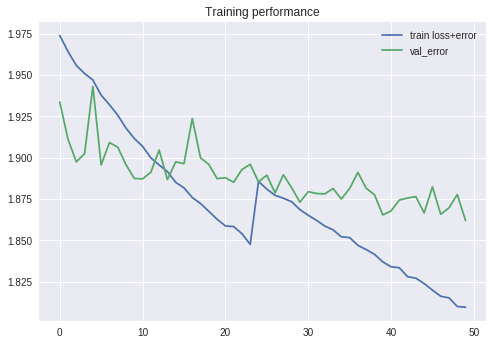

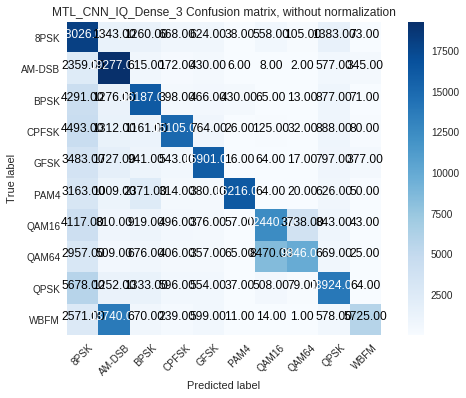

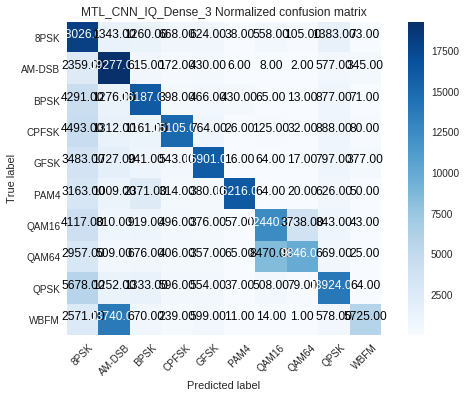

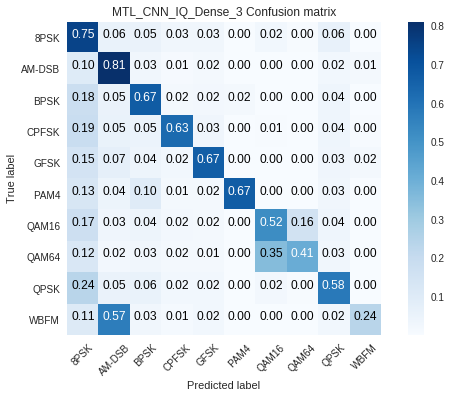

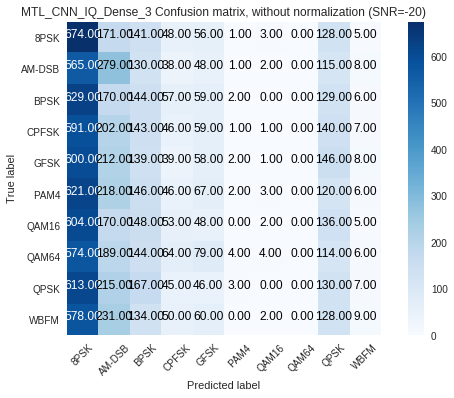

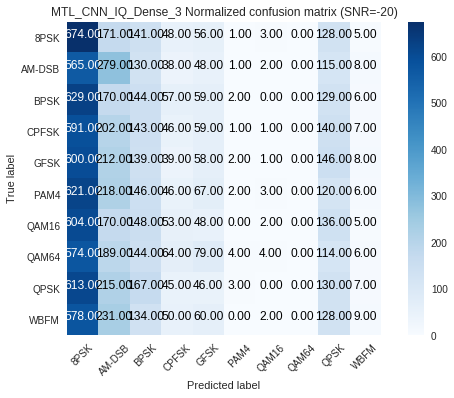

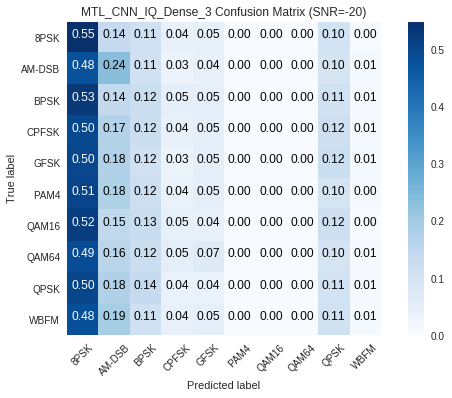

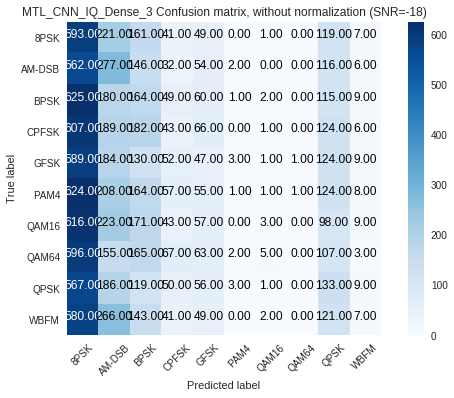

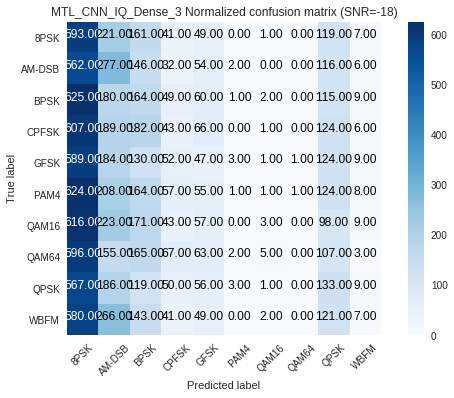

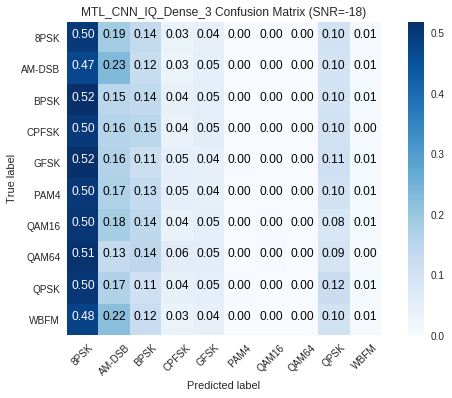

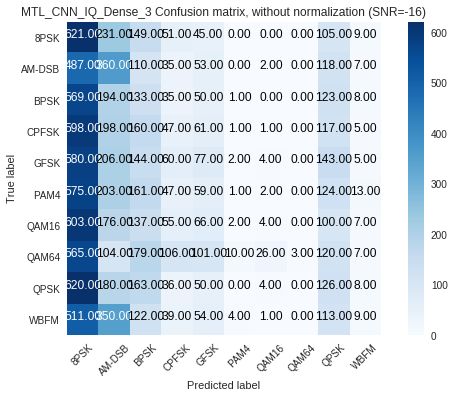

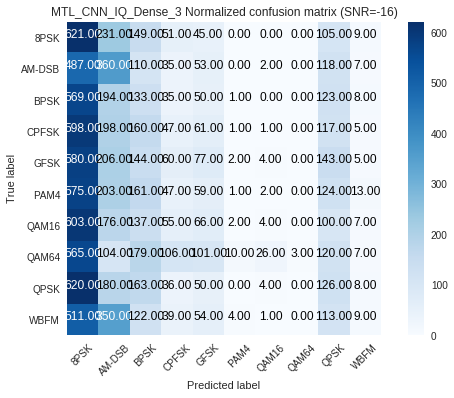

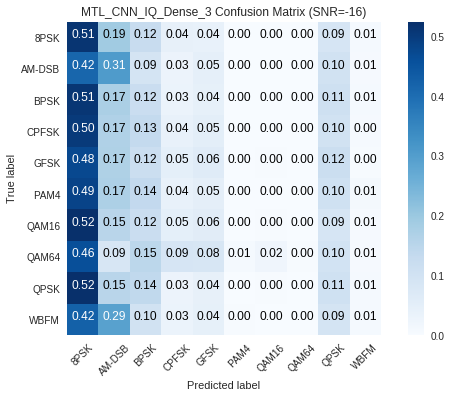

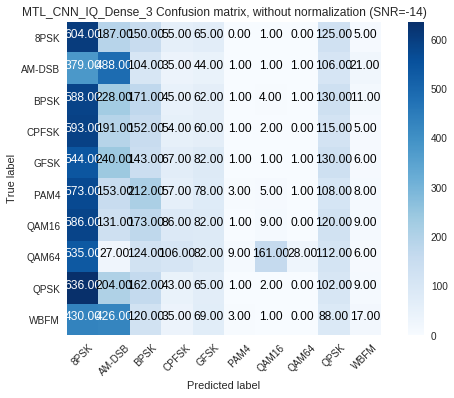

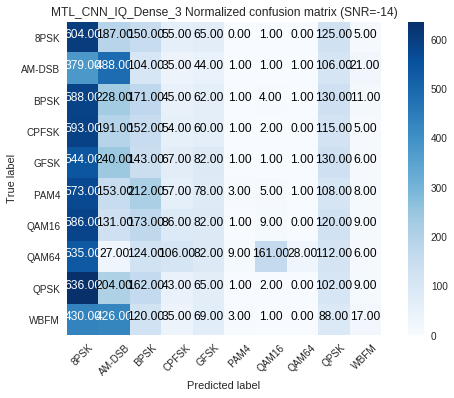

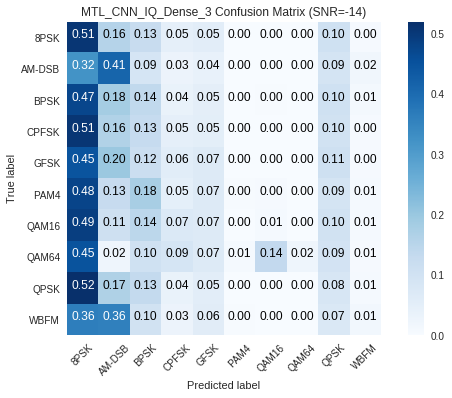

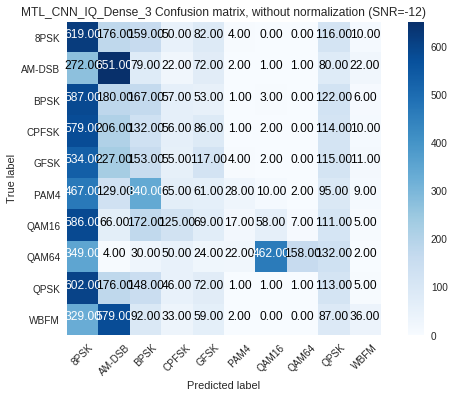

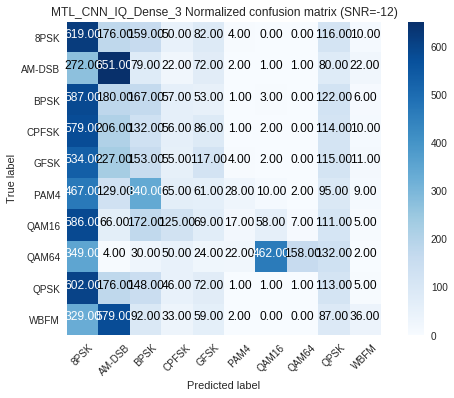

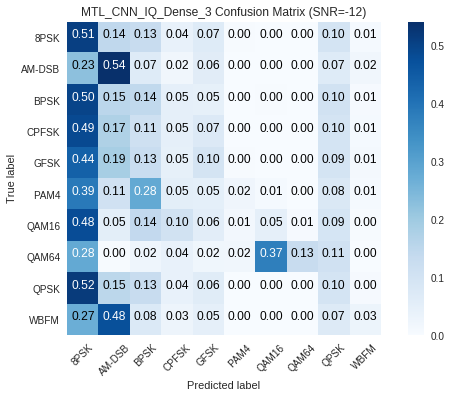

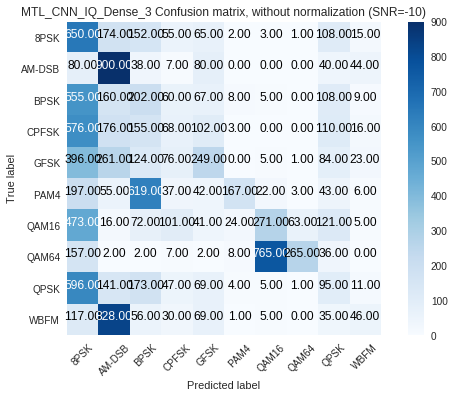

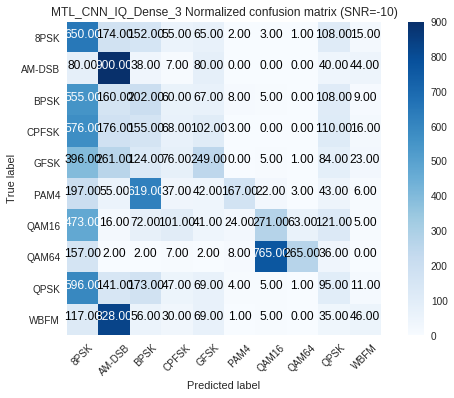

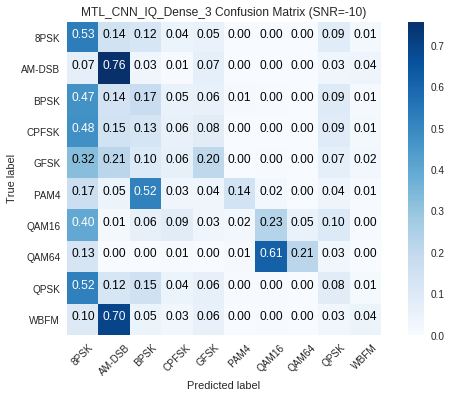

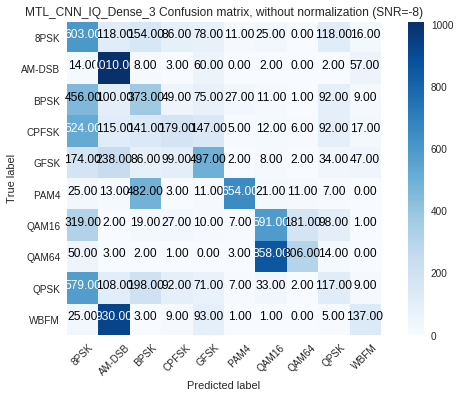

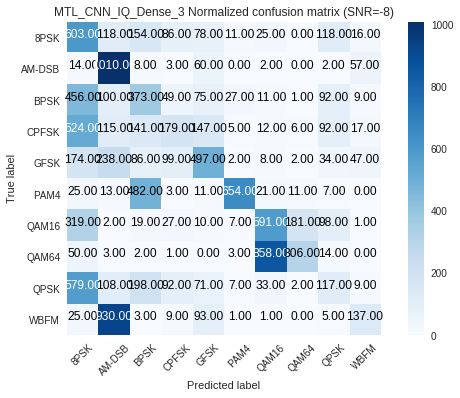

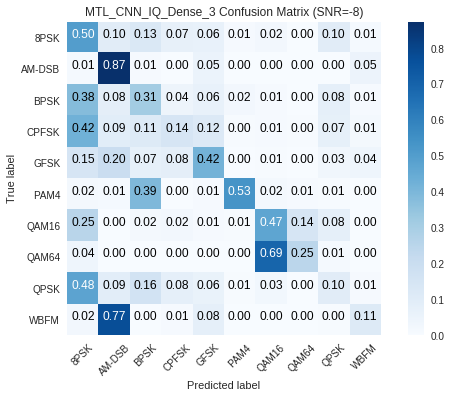

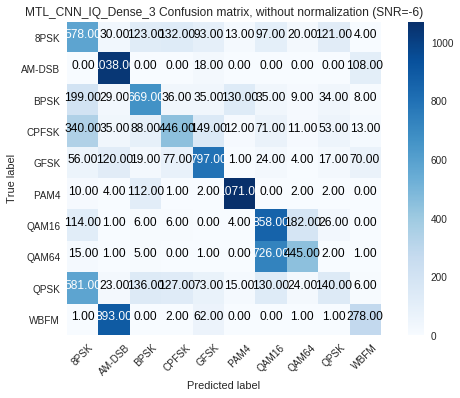

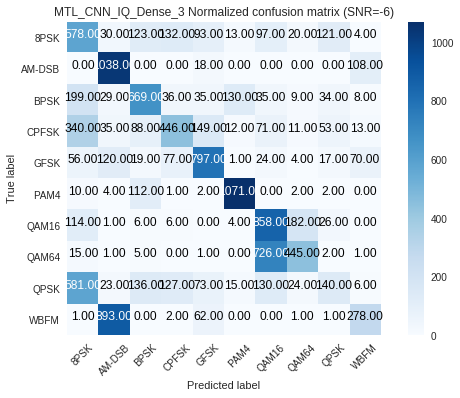

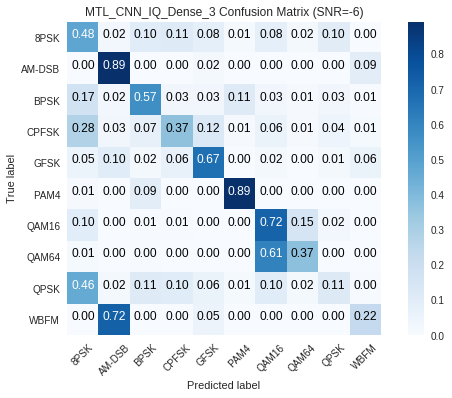

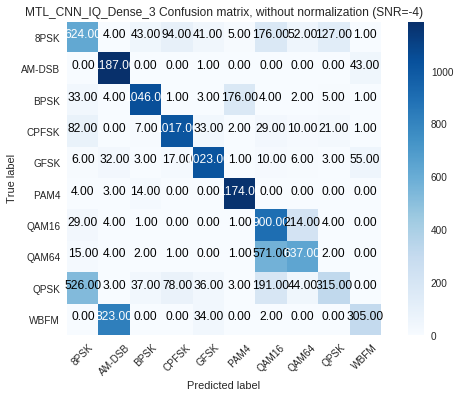

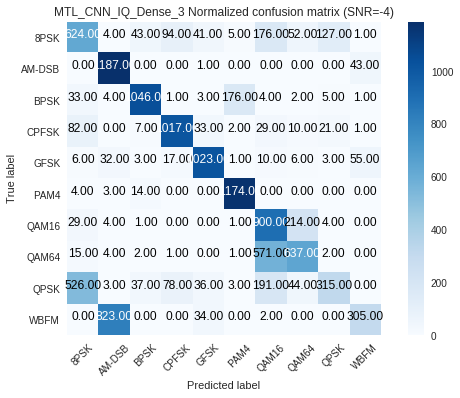

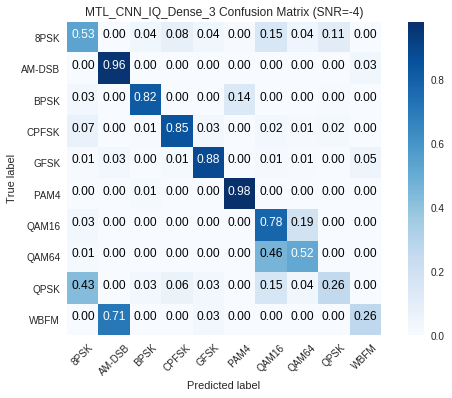

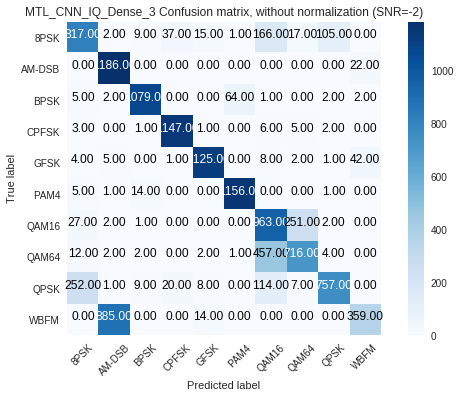

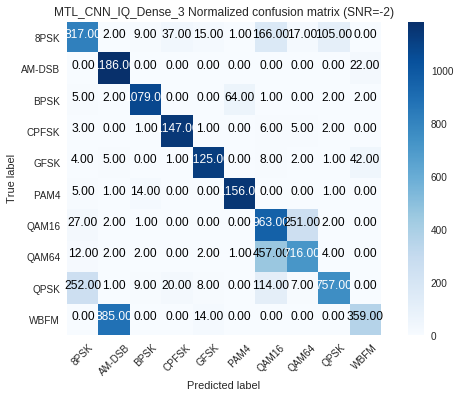

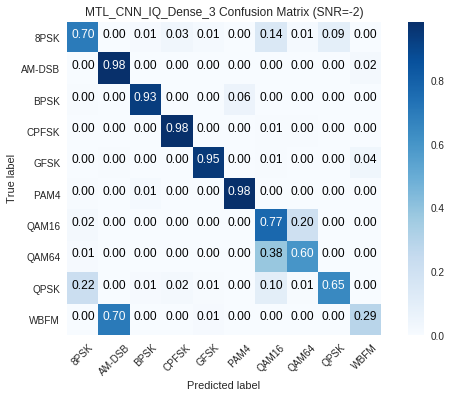

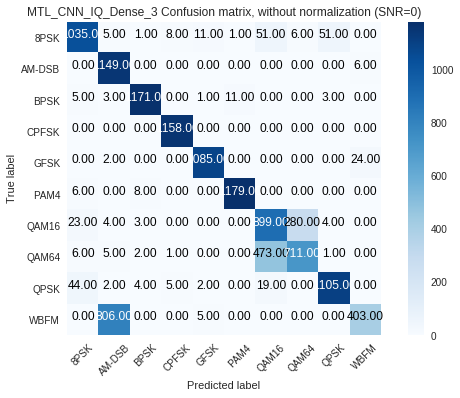

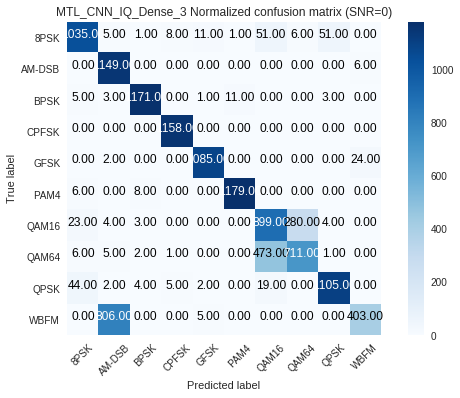

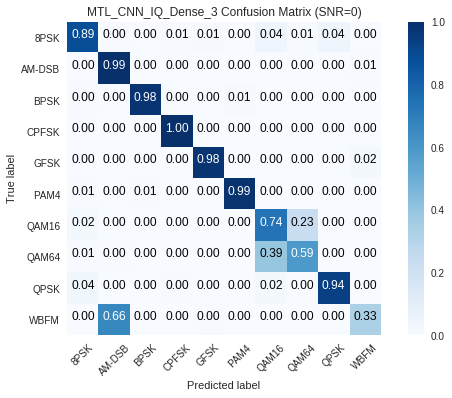

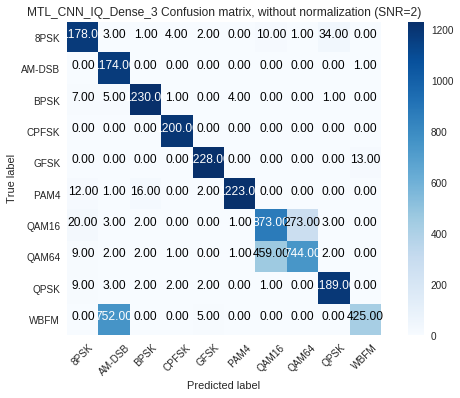

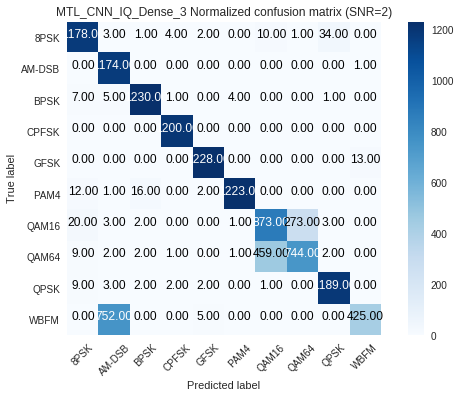

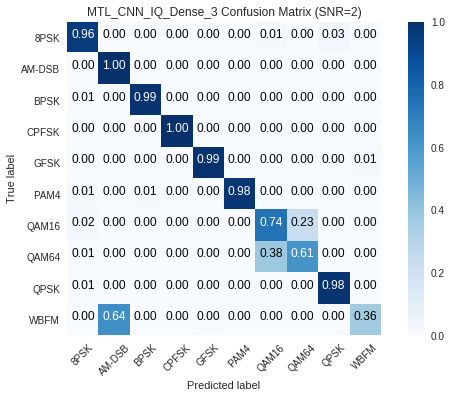

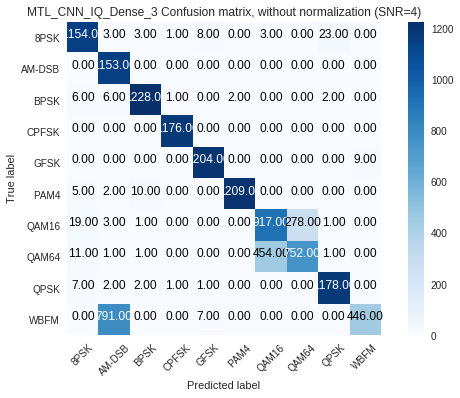

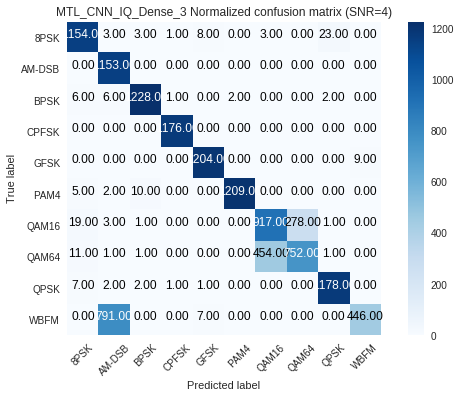

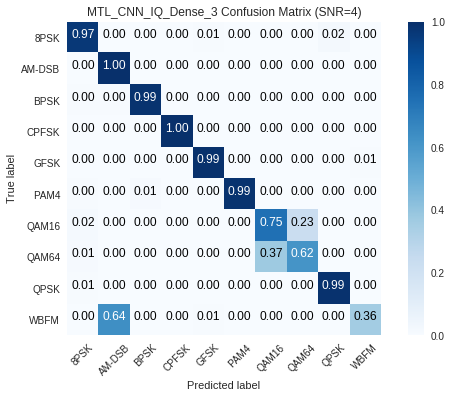

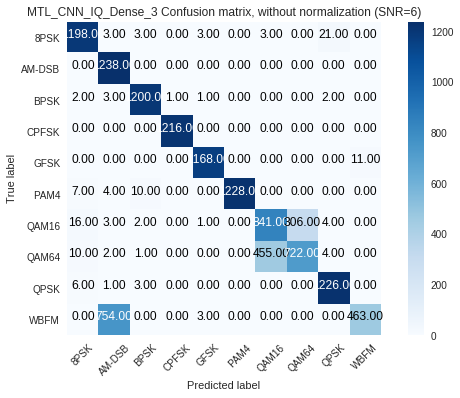

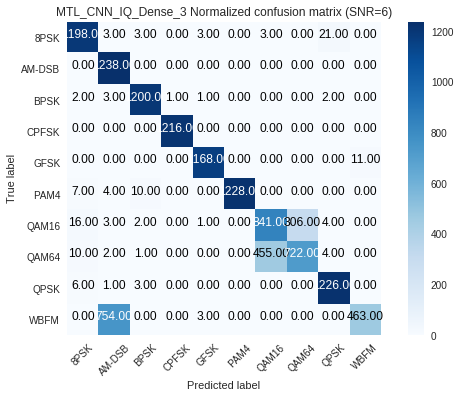

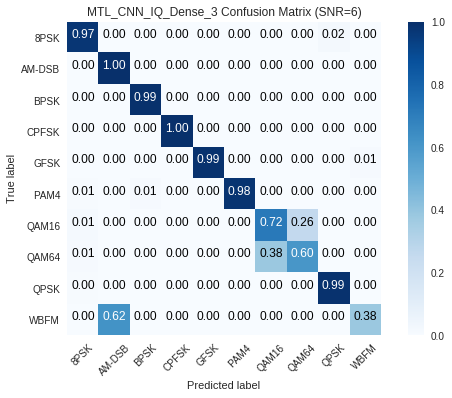

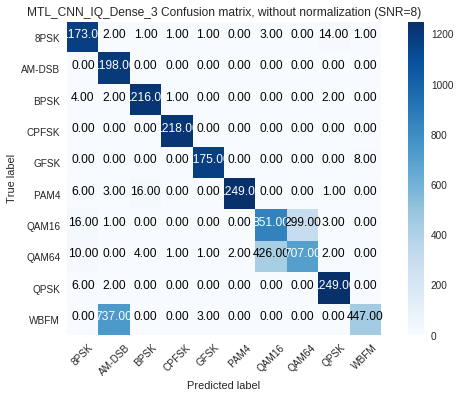

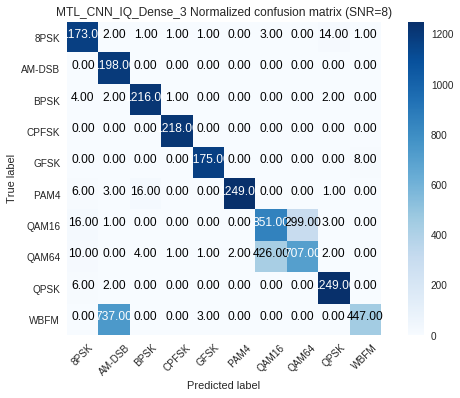

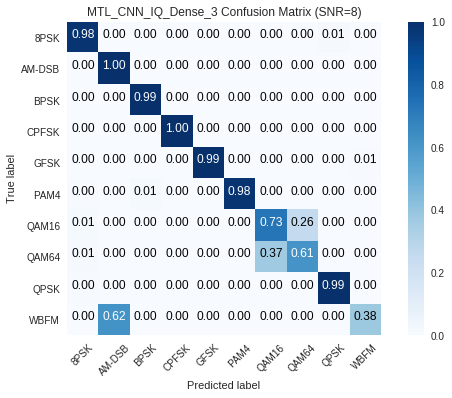

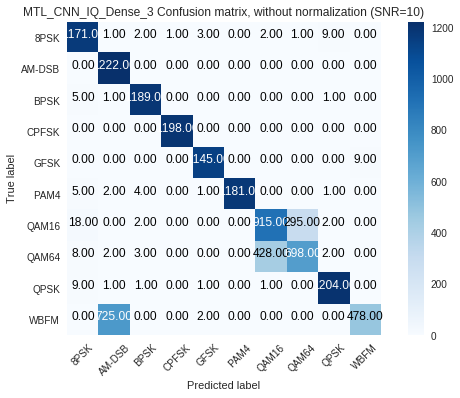

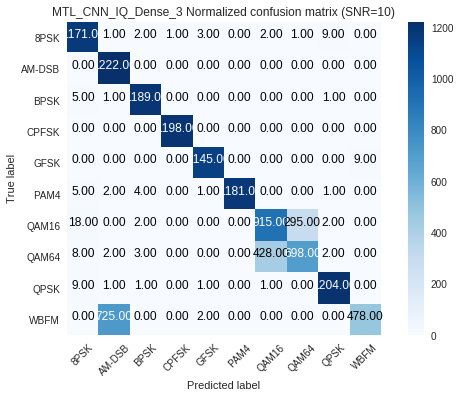

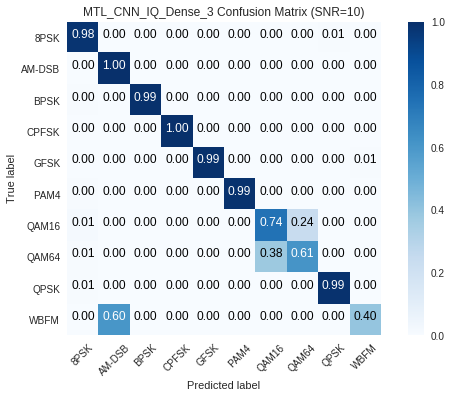

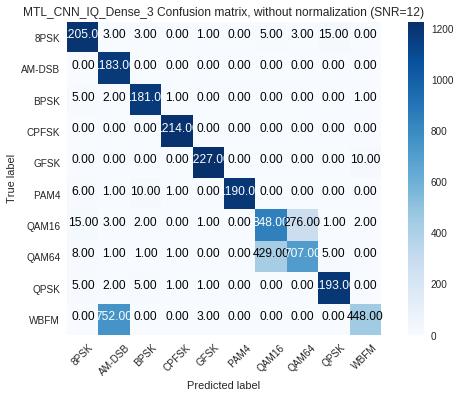

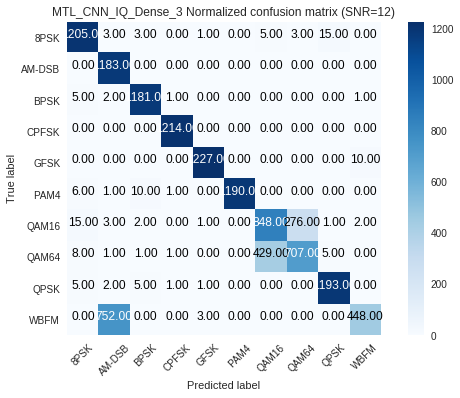

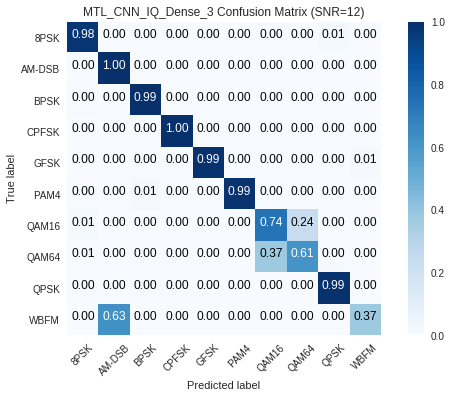

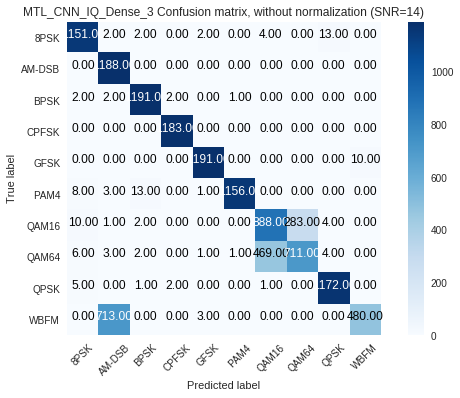

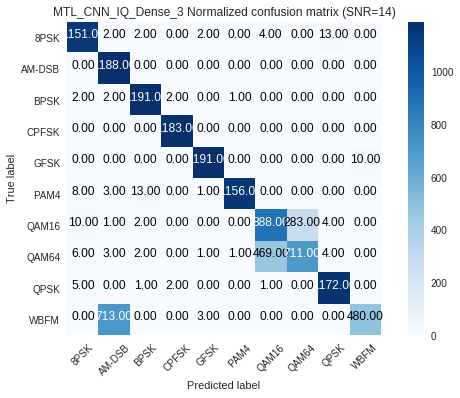

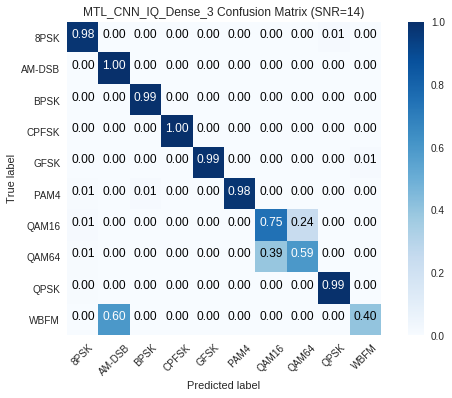

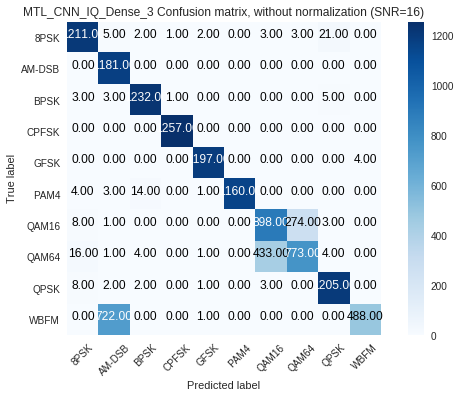

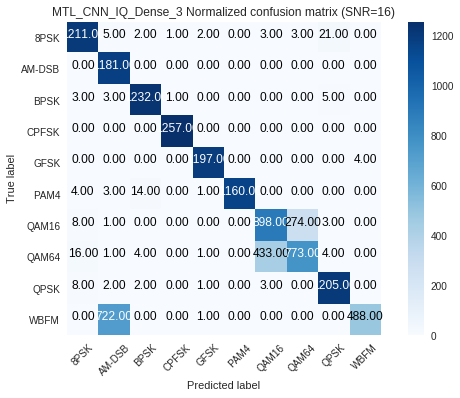

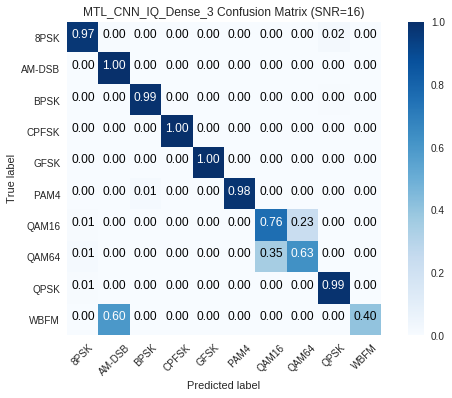

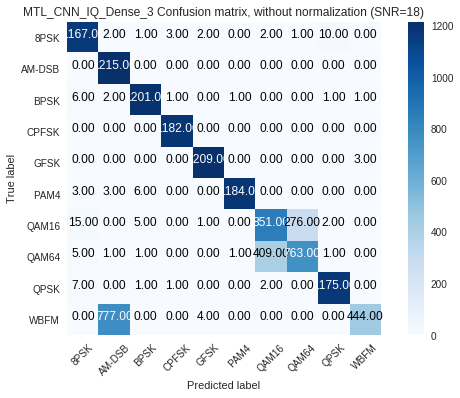

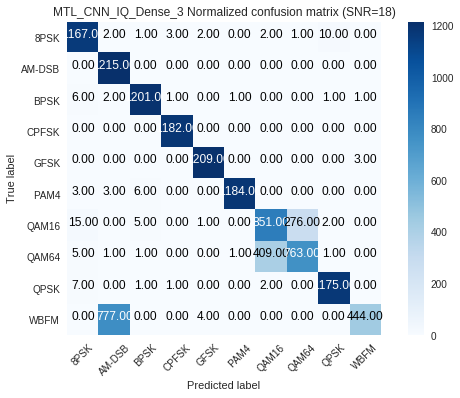

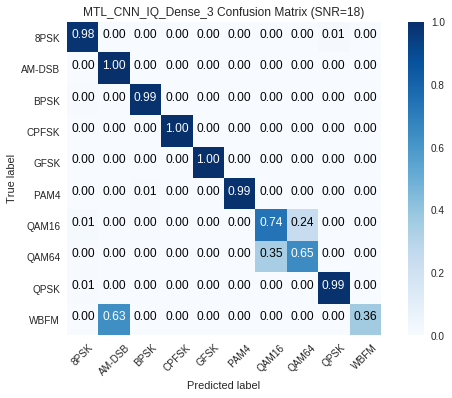

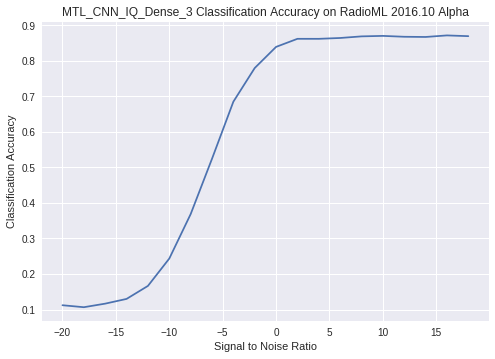

In [0]:
#@title MTL-CNN
import itertools
name = 'MTL_CNN'  
snrs, mods = map(lambda j: sorted(list(set(map(lambda x: x[j], Xd.keys())))), [1, 0])

X = []
lbl = []
lbl1 = []
lbl2 = []
lbl3 = []

mods1 = ['QAM16','QAM64','Other']
mods2 = ['QPSK','8PSK','Other']
mods3 = ['AM-DSB','WBFM','Other']
for mod in mods:
    for snr in snrs:
	X.append(Xd[(mod, snr)])
	if mod in ['QAM16','QAM64']:
        	for i in range(Xd[(mod, snr)].shape[0]):
			lbl.append((mod, snr))
			lbl1.append((mod,snr))
			lbl2.append(('Other',snr))
			lbl3.append(('Other',snr))
	elif mod in ['QPSK','8PSK']:
		for i in range(Xd[(mod, snr)].shape[0]):
			lbl.append((mod, snr))
			lbl1.append(('Other',snr))
			lbl2.append((mod,snr))
			lbl3.append(('Other',snr))
	elif mod in ['AM-DSB','WBFM']:
		for i in range(Xd[(mod, snr)].shape[0]):
			lbl.append((mod, snr))
			lbl1.append(('Other',snr))
			lbl2.append(('Other',snr))
			lbl3.append((mod,snr))
	else:
		for i in range(Xd[(mod, snr)].shape[0]):
			lbl.append((mod, snr))
			lbl1.append(('Other',snr))
			lbl2.append(('Other',snr))
			lbl3.append(('Other',snr))
X = np.vstack(X)

# %%
np.random.seed(2016)  
n_examples = X.shape[0]
n_train = n_examples * 0.6
train_idx = np.random.choice(range(0, n_examples), size=int(n_train), replace=False)
rem_idx = list(set(range(0, n_examples)) - set(train_idx))  # label
n_validate = (n_examples-n_train) * 0.5
validate_idx = np.random.choice(rem_idx, size=int(n_validate), replace=False)
test_idx = list(set(rem_idx) - set(validate_idx))  # label

train_idx = np.loadtxt(path+'train_idx.txt')
test_idx = np.loadtxt(path+'test_idx.txt')
validate_idx = np.loadtxt(path+'validate_idx_.txt')
train_idx = train_idx.astype(int)
test_idx = test_idx.astype(int)
validate_idx = validate_idx.astype(int)

X_train = X[train_idx]
X_test = X[test_idx]
X_validate = X[validate_idx]

def to_onehot(yy):
    yy1 = np.zeros([len(yy), max(yy) + 1])
    yy1[np.arange(len(yy)), yy] = 1
    return yy1

Y_train = to_onehot(list(map(lambda x: mods.index(lbl[x][0]), train_idx)))
Y_train1 = to_onehot(list(map(lambda x: mods1.index(lbl1[x][0]), train_idx)))
Y_train2 = to_onehot(list(map(lambda x: mods2.index(lbl2[x][0]), train_idx)))
Y_train3 = to_onehot(list(map(lambda x: mods3.index(lbl3[x][0]), train_idx)))

Y_test = to_onehot(list(map(lambda x: mods.index(lbl[x][0]), test_idx)))
Y_test1 = to_onehot(list(map(lambda x: mods1.index(lbl1[x][0]), test_idx)))
Y_test2 = to_onehot(list(map(lambda x: mods2.index(lbl2[x][0]), test_idx)))
Y_test3 = to_onehot(list(map(lambda x: mods3.index(lbl3[x][0]), test_idx)))

Y_validate = to_onehot(list(map(lambda x: mods.index(lbl[x][0]), validate_idx)))
Y_validate1 = to_onehot(list(map(lambda x: mods1.index(lbl1[x][0]), validate_idx)))
Y_validate2 = to_onehot(list(map(lambda x: mods2.index(lbl2[x][0]), validate_idx)))
Y_validate3 = to_onehot(list(map(lambda x: mods3.index(lbl3[x][0]), validate_idx)))

# %%
in_shp = list(X_train.shape[1:])
print (X_train.shape, in_shp)
classes = mods
classes1 = mods1
classes2 = mods2
classes3 = mods3
# %%
dr = 0.5

####
visible = Input(shape=in_shp)
reshape = Reshape(([1] + in_shp), input_shape=in_shp)(visible)

pad11 = ZeroPadding2D((0, 2), data_format="channels_first")(reshape)
conv11 = Conv2D(256, (1,3),padding='valid', activation='relu',data_format='channels_first',init='glorot_uniform')(pad11)
drop11 = Dropout(dr)(conv11)
pad21 = ZeroPadding2D((0, 2), data_format="channels_first")(drop11)
conv21 = Conv2D(80, (2,3),padding='valid', activation='relu',data_format='channels_first',init='glorot_uniform')(pad21)
drop21 = Dropout(dr)(conv21)
flat11 = Flatten()(drop21)
dense11 = Dense(256, activation='relu', init='he_normal')(flat11)
drop31 = Dropout(dr)(dense11)
dense21 = Dense(len(classes1), init='he_normal')(drop31)
act11 = Activation('softmax')(dense21)
output1 = Reshape([len(classes1)])(act11)

pad12 = ZeroPadding2D((0, 2), data_format="channels_first")(reshape)
conv12 = Conv2D(256, (1,3),padding='valid', activation='relu',data_format='channels_first',init='glorot_uniform')(pad12)
drop12 = Dropout(dr)(conv12)
pad22 = ZeroPadding2D((0, 2), data_format="channels_first")(drop12)
conv22 = Conv2D(80, (2,3),padding='valid', activation='relu',data_format='channels_first',init='glorot_uniform')(pad22)
drop22 = Dropout(dr)(conv22)
flat12 = Flatten()(drop22)
dense12 = Dense(256, activation='relu', init='he_normal')(flat12)
drop32 = Dropout(dr)(dense12)
dense22 = Dense(len(classes2), init='he_normal')(drop32)
act12 = Activation('softmax')(dense22)
output2 = Reshape([len(classes2)])(act12)

pad13 = ZeroPadding2D((0, 2), data_format="channels_first")(reshape)
conv13 = Conv2D(256, (1,3),padding='valid', activation='relu',data_format='channels_first',init='glorot_uniform')(pad13)
drop13 = Dropout(dr)(conv13)
pad23 = ZeroPadding2D((0, 2), data_format="channels_first")(drop13)
conv23 = Conv2D(80, (2,3),padding='valid', activation='relu',data_format='channels_first',init='glorot_uniform')(pad23)
drop23 = Dropout(dr)(conv23)
flat13 = Flatten()(drop23)
dense13 = Dense(256, activation='relu', init='he_normal')(flat13)
drop33 = Dropout(dr)(dense13)
dense23 = Dense(len(classes3), init='he_normal')(drop33)
act13 = Activation('softmax')(dense23)
output3 = Reshape([len(classes3)])(act13)

pad14 = ZeroPadding2D((0, 2), data_format="channels_first")(reshape)
conv14 = Conv2D(256, (1,3),padding='valid', activation='relu',data_format='channels_first',init='glorot_uniform')(pad14)
drop14 = Dropout(dr)(conv14)
pad24 = ZeroPadding2D((0, 2), data_format="channels_first")(drop14)
conv24 = Conv2D(80, (2,3),padding='valid', activation='relu',data_format='channels_first',init='glorot_uniform')(pad24)
drop24 = Dropout(dr)(conv24)
flat14 = Flatten()(drop24)
#merge = concatenate([flat11, flat12, flat13, flat14])
dense14 = Dense(256, activation='relu', init='he_normal')(flat14)
merge = concatenate([dense11, dense12, dense13, dense14])
drop34 = Dropout(dr)(merge)
dense24 = Dense(256, activation='relu', init='he_normal')(drop34)
drop44 = Dropout(dr)(dense24)
dense34 = Dense(len(classes), init='he_normal')(drop44)
act14 = Activation('softmax')(dense34)
output = Reshape([len(classes)])(act14)

model = Model(inputs=visible, outputs=[output1,output2,output3,output])
epochs = 50  # number of epochs to train on
batch_size = 1024  # training batch size default1024
# %%
model.compile(loss='categorical_crossentropy', optimizer='adam')

# summarize layers
print(model.summary())
#plot_model(model, to_file='AllClasses.png')
# %%
filepath = name+".h5"  
model.load_weights(path+'MTL_CNN.h5')
model.compile(loss='categorical_crossentropy', optimizer='adam')
score = model.evaluate(X_test, [Y_test1,Y_test2,Y_test3,Y_test], verbose=0, batch_size=batch_size)
print score
history = model.fit(X_train,
                    [Y_train1,Y_train2,Y_train3,Y_train],
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=2,
                    validation_data=([X_validate],[Y_validate1,Y_validate2,Y_validate3,Y_validate]),
                    callbacks=[
                        keras.callbacks.ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=False, save_weights_only=False,
                                                        mode='auto', period=2),
                        keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='auto')
                    ])
model.load_weights(filepath)
score = model.evaluate(X_test, [Y_test1,Y_test2,Y_test3,Y_test], verbose=0, batch_size=batch_size)

# Show loss curves
plt.figure()
plt.title('Training performance')
plt.plot(history.epoch, history.history['loss'], label='train loss+error')
plt.plot(history.epoch, history.history['val_loss'], label='val_error')
plt.legend()
plt.savefig('%s Training performance' %(name))
# plt.show()

print('evaluate_score:', score)

def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues, labels=[]):
    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)
    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig(title)
    plt.grid('off')
    # plt.show()

# Plot confusion matrix
test_Y_hat = model.predict(X_test, batch_size=batch_size)

pre_labels = []
for x in test_Y_hat[3]:
    tmp = np.argmax(x, 0)
    pre_labels.append(tmp)
true_labels = []
for x in Y_test:
    tmp = np.argmax(x, 0)
    true_labels.append(tmp)

kappa = cohen_kappa_score(pre_labels, true_labels)
oa = accuracy_score(true_labels, pre_labels)
kappa_oa = {}
print('oa_all:', oa)
print('kappa_all:', kappa)
kappa_oa['oa_all'] = oa
kappa_oa['kappa_all'] = kappa
fd = open(path+name+'results_all.dat', 'wb')
cPickle.dump(("%s" % (name), 0.5, kappa_oa), fd)
fd.close()
cnf_matrix = confusion_matrix(true_labels, pre_labels)
# np.set_printoptions(precision=2)
# Plot non-normalized confusion matrix
# plt.figure()
plot_confusion_matrix(cnf_matrix, labels=classes,
                             title='%s Confusion matrix, without normalization' % (name))
plt.savefig('%s Confusion matrix, without normalization' % (name))
# Plot normalized confusion matrix
# plt.figure()
plot_confusion_matrix(cnf_matrix, labels=classes,
                             title='%s Normalized confusion matrix' % (name))
plt.savefig('%s Normalized confusion matrix' % (name))
# plt.show()

conf = np.zeros([len(classes), len(classes)])
confnorm = np.zeros([len(classes), len(classes)])
for i in range(0, X_test.shape[0]):
    j = list(Y_test[i, :]).index(1)
    k = int(np.argmax(test_Y_hat[3][i, :]))
    conf[j, k] += 1
for i in range(0, len(classes)):
    confnorm[i, :] = conf[i, :] / np.sum(conf[i, :])
plot_confusion_matrix(confnorm, labels=classes, title='%s Confusion matrix' % (name))

# %%Plot confusion matrix
acc = {}
kappa_dict = {}
oa_dict = {}
for snr in snrs:

    # extract classes @ SNR
    test_SNRs = list(map(lambda x: lbl[x][1], test_idx))
    test_X_i = X_test[np.where(np.array(test_SNRs) == snr)]
    test_Y_i = Y_test[np.where(np.array(test_SNRs) == snr)]

    # estimate classes
    test_Y_i_hat = model.predict(test_X_i)

    pre_labels_i = []
    for x in test_Y_i_hat[3]:
        tmp = np.argmax(x, 0)
        pre_labels_i.append(tmp)
    true_labels_i = []
    for x in test_Y_i:
        tmp = np.argmax(x, 0)
        true_labels_i.append(tmp)
    kappa = cohen_kappa_score(pre_labels_i, true_labels_i)
    oa = accuracy_score(true_labels_i, pre_labels_i)
    oa_dict[snr] = oa
    kappa_dict[snr] = kappa
    cnf_matrix = confusion_matrix(true_labels_i, pre_labels_i)
    # np.set_printoptions(precision=2)
    # Plot non-normalized confusion matrix
    # plt.figure()
    plot_confusion_matrix(cnf_matrix, labels=classes,
                                 title='%s Confusion matrix, without normalization (SNR=%d)' % (name, snr))
    plt.savefig('%s Confusion matrix, without normalization (SNR=%d)' % (name, snr))
    # Plot normalized confusion matrix
    # plt.figure()
    plot_confusion_matrix(cnf_matrix, labels=classes,
                                 title='%s Normalized confusion matrix (SNR=%d)' % (name, snr))
    plt.savefig('%s Normalized confusion matrix (SNR=%d)' % (name, snr))
    # plt.show()

    conf = np.zeros([len(classes), len(classes)])
    confnorm = np.zeros([len(classes), len(classes)])
    for i in range(0, test_X_i.shape[0]):
        j = list(test_Y_i[i, :]).index(1)
        k = int(np.argmax(test_Y_i_hat[3][i, :]))
        conf[j, k] += 1
    for i in range(0, len(classes)):
        confnorm[i, :] = conf[i, :] / np.sum(conf[i, :])
    # plt.figure()
    plot_confusion_matrix(confnorm, labels=classes, title="%s Confusion Matrix (SNR=%d)" % (name, snr))

    cor = np.sum(np.diag(conf))
    ncor = np.sum(conf) - cor
    print ("Overall Accuracy: ", cor / (cor + ncor))
    acc[snr] = 1.0 * cor / (cor + ncor)

# %%Save results to a pickle file for plotting later
print 'acc:', acc
fd = open(path+name+'results.dat', 'wb')
cPickle.dump(("%s" % (name), 0.5, acc), fd)
fd.close()
print('oa:', oa_dict)
fd = open(path+name+'results_oa.dat', 'wb')
cPickle.dump(("%s" % (name), 0.5, oa_dict), fd)
fd.close()
print('kappa:', kappa_dict)
fd = open(path+name+'results_kappa.dat', 'wb')
cPickle.dump(("%s" % (name), 0.5, kappa_dict), fd)
fd.close()

# %%Plot accuracy curve
plt.figure()
plt.plot(snrs, list(map(lambda x: acc[x], snrs)))
plt.xlabel("Signal to Noise Ratio")
plt.ylabel("Classification Accuracy")
plt.title("%s Classification Accuracy on RadioML 2016.10 Alpha" % (name))
plt.savefig("%s Classification Accuracy" % (name))
# plt.show()